##### Соколовский В.Д., № 2372
# Лабораторная работа №2: Кластеризация методом K-means

### Цель работы
Цель данной лабораторной работы — ознакомиться с методом кластеризации K-means на примере набора данных о глобальном индексе искусственного интеллекта. В ходе выполнения работы мы:
- Добавим новый атрибут к набору данных.
- Проведем очистку данных от выбросов и дубликатов.
- Построим графики рассеивания для визуализации группировок данных.
- Применим метод K-means для кластеризации данных и сделаем выводы по результатам.

### 1. Загрузка

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [15]:
data = pd.read_csv('AI_index_db.csv')

### 2. Добавление нового атрибута
Добавим новый атрибут Innovation, который будет представлять собой среднее значение между показателями "Research" и "Development".

In [4]:
# Добавление нового атрибута "Innovation"
data['Innovation'] = (data['Research'] + data['Development']) / 2

# Проверка добавления нового атрибута
data[['Research', 'Development', 'Innovation']].head()


,Research,Development,Innovation
0,100.00,100.00,100.000
1,71.42,79.97,75.695
2,36.50,25.03,30.765
3,30.67,25.78,28.225
4,32.63,27.96,30.295


### 3. Обработка данных
#### 3.1 Обработка пропущенных значений
В данных нет пропущенных значений, так как в ходе предварительного анализа было установлено, что все значения присутствуют.

#### 3.2 Удаление выбросов
Для выявления и удаления выбросов используем межквартильный размах (IQR).

In [8]:
# Выбираем только числовые столбцы
numeric_cols = data.select_dtypes(include=['float64']).columns

# Определение межквартильного размаха (IQR) для числовых столбцов
Q1 = data[numeric_cols].quantile(0.25)
Q3 = data[numeric_cols].quantile(0.75)
IQR = Q3 - Q1

# Удаление выбросов только для числовых столбцов
data_cleaned = data[~((data[numeric_cols] < (Q1 - 1.5 * IQR)) | (data[numeric_cols] > (Q3 + 1.5 * IQR))).any(axis=1)]

# Проверка на дубликаты
data_cleaned = data_cleaned.drop_duplicates()

# Просмотр количества данных после очистки
data_cleaned.shape

(50, 14)

#### 3.3 Статистическое описание данных

In [9]:
# Описание данных после очистки
data_cleaned.describe()

,Talent,Infrastructure,Operating Environment,Research,Development,Government Strategy,Commercial,Total score,Innovation
count,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.00000,50.000000
mean,14.666600,64.771800,68.982400,13.555000,10.688800,57.022800,2.866200,21.72800,12.121900
std,9.670492,14.716215,15.909686,10.786395,10.814444,24.339184,2.393546,8.13317,10.017396
min,0.000000,33.910000,35.790000,0.000000,0.000000,0.000000,0.000000,6.62000,0.305000
25%,7.365000,56.805000,58.697500,3.390000,0.967500,41.030000,0.812500,15.26250,3.462500
50%,12.740000,64.930000,70.185000,12.085000,6.850000,61.890000,2.370000,21.51000,9.167500
75%,20.857500,73.890000,79.705000,21.907500,18.192500,72.095000,4.607500,28.57000,20.531250
max,45.270000,96.110000,100.000000,38.240000,41.150000,91.630000,8.290000,36.35000,36.890000


### 4. Визуализация данных
#### 4.1 Построение графиков рассеивания
Для лучшего понимания взаимосвязей между переменными построим несколько графиков рассеивания.

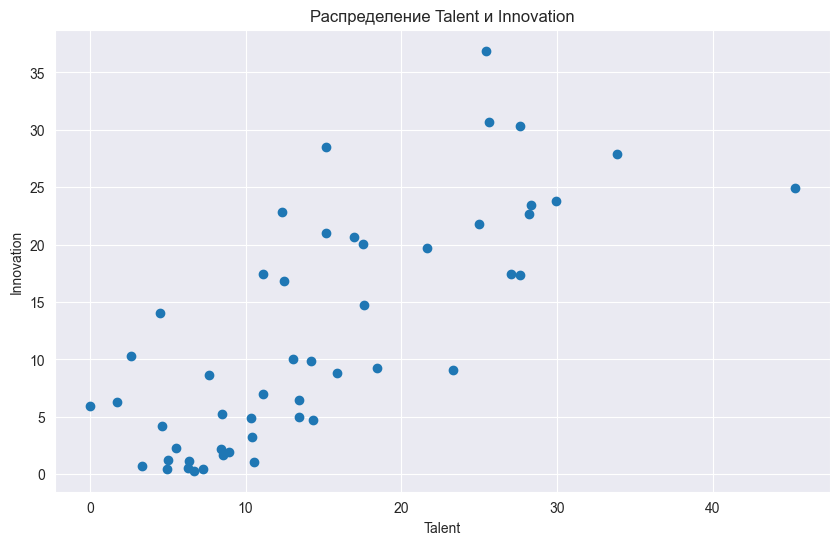

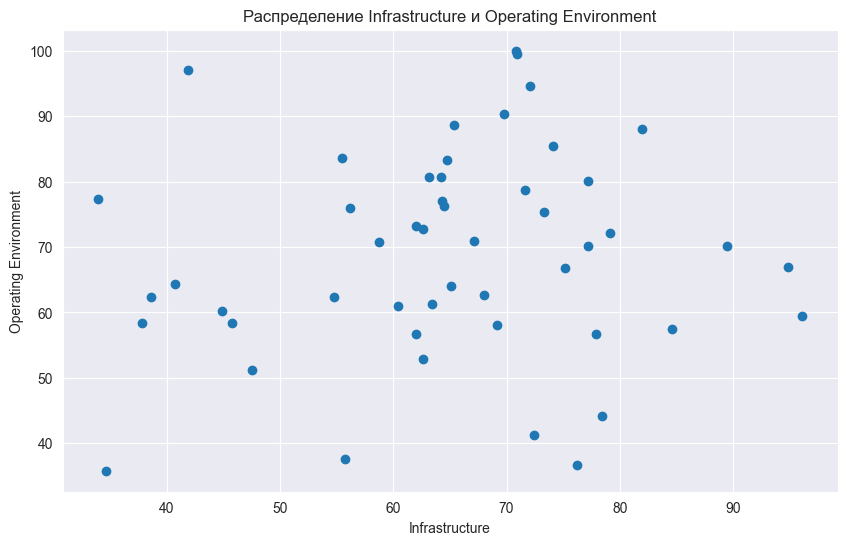

In [10]:
plt.figure(figsize=(10, 6))
plt.scatter(data_cleaned['Talent'], data_cleaned['Innovation'])
plt.title('Распределение Talent и Innovation')
plt.xlabel('Talent')
plt.ylabel('Innovation')
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(data_cleaned['Infrastructure'], data_cleaned['Operating Environment'])
plt.title('Распределение Infrastructure и Operating Environment')
plt.xlabel('Infrastructure')
plt.ylabel('Operating Environment')
plt.show()

#### Вывод по визуализации:
* На графике "Talent и Innovation" можно увидеть несколько групп стран с высокими и низкими показателями.
* На графике "Infrastructure и Operating Environment" также заметны кластеры стран с различными уровнями инфраструктуры и операционной среды.

### 5. Кластеризация методом K-means
#### 5.1 Стандартизация данных
Перед применением алгоритма K-means необходимо стандартизировать данные, чтобы каждый показатель имел одинаковую шкалу.

In [11]:
# Выбор числовых атрибутов для кластеризации
X = data_cleaned[['Talent', 'Innovation', 'Infrastructure', 'Operating Environment']]

# Стандартизация данных
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#### 5.2 Применение алгоритма K-means
Применим метод K-means для кластеризации данных с числом кластеров 3.

In [12]:
# Применение метода K-means
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_scaled)

# Добавление меток кластеров в данные
data_cleaned['Cluster'] = kmeans.labels_

# Просмотр первых строк данных с метками кластеров
data_cleaned[['Country', 'Cluster']].head()

,Country,Cluster
7,The Netherlands,2
8,Germany,2
9,France,2
10,Australia,2
11,Ireland,2


#### 5.3 Визуализация кластеров
Теперь визуализируем результаты кластеризации на графиках.

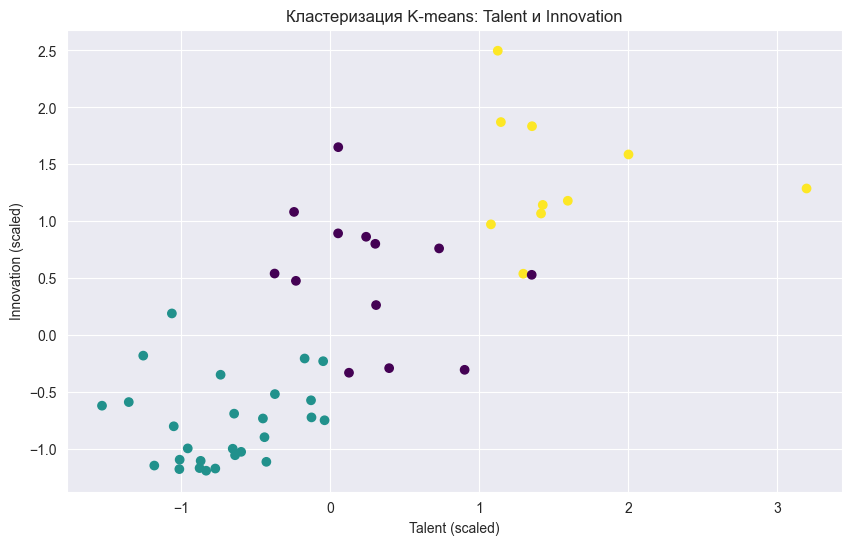

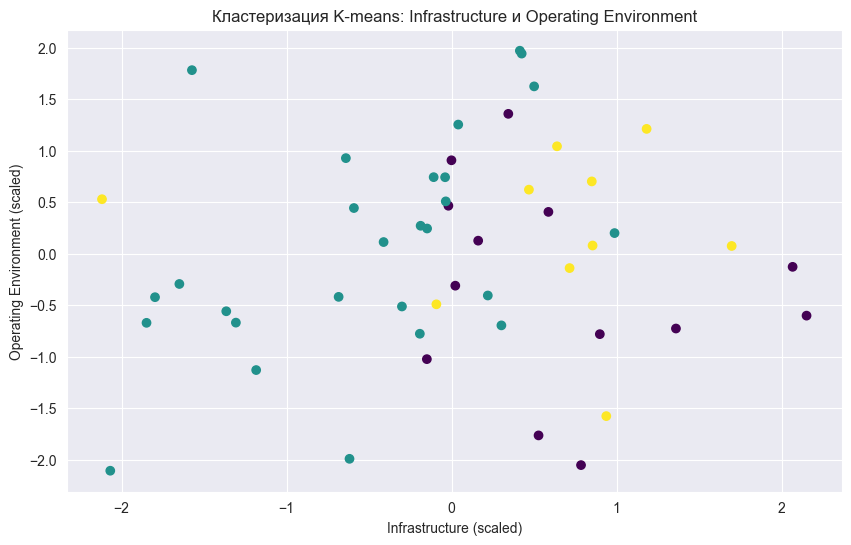

In [14]:
plt.figure(figsize=(10, 6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=data_cleaned['Cluster'], cmap='viridis')
plt.title('Кластеризация K-means: Talent и Innovation')
plt.xlabel('Talent (scaled)')
plt.ylabel('Innovation (scaled)')
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(X_scaled[:, 2], X_scaled[:, 3], c=data_cleaned['Cluster'], cmap='viridis')
plt.title('Кластеризация K-means: Infrastructure и Operating Environment')
plt.xlabel('Infrastructure (scaled)')
plt.ylabel('Operating Environment (scaled)')
plt.show()

### 6. Выводы
* После применения метода кластеризации K-means было выделено три кластера, которые можно визуально разделить на графиках "Talent и Innovation", а также "Infrastructure и Operating Environment".
* Кластеризация показывает, что страны с высоким уровнем квалифицированных специалистов и высоким инновационным потенциалом группируются вместе.
* Страны с развитой инфраструктурой и благоприятной операционной средой также формируют отдельный кластер.
* Алгоритм K-means помог выявить различные группы стран с похожими уровнями развития ИИ, что может быть полезно для дальнейшего анализа и разработки стратегий по улучшению ИИ в странах, находящихся в менее развитых кластерах.